In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import sys

try:
  import preprocessor as esik
except ModuleNotFoundError:
  file_path = "../Tehtava-03/preprocessor.py"; module_name = "preprocessor"; spec = importlib.util.spec_from_file_location(module_name, file_path)
  esik = importlib.util.module_from_spec(spec); sys.modules[module_name] = esik; spec.loader.exec_module(esik)

try:
  import columns_file as cf
except ModuleNotFoundError:
  file_path = "../Tehtava-03/columns_file.py"; module_name = "columns_file"; spec = importlib.util.spec_from_file_location(module_name, file_path)
  cf = importlib.util.module_from_spec(spec); sys.modules[module_name] = cf; spec.loader.exec_module(cf)

price_col = 'price_per_W'

cols = ['year', 'battery_storage', price_col, 'customer_segment', 'customer_segment_2', 'customer_segment_3']

df_all = esik.esik(cols)
print("df_all.shape:", df_all.shape)

c:\Lvarasto\jkl_ohjelmointi_2021\solar-panel-data-project\kokeelliset\../Tehtava-03/preprocessor.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['customer_segment_3'].replace({'SMALL NON-RES': 'LARGE NON-RES'}, regex=True, inplace=True)


df_all.shape: (1000000, 6)


### Yksi kuva, jossa kaikki asennukset mukana

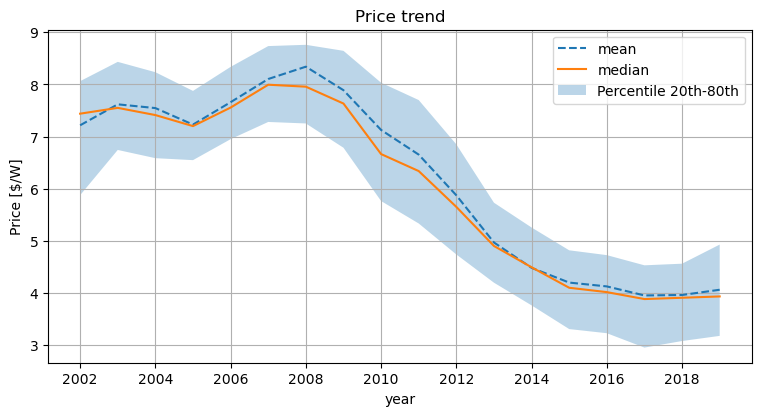

In [21]:
df = df_all.copy()
df = df[(df['battery_storage'] == 0)]
d_cols = ['battery_storage', 'customer_segment', 'customer_segment_2', 'customer_segment_3']
df.drop(d_cols, axis=1, inplace=True)
#df = df[(df['year'] > 2001)]

year_stats = df.groupby(['year'])
#display(year_stats.indices)

q_width = 0.6
q_high = 0.5 + q_width * 0.5
q_low = 0.5 - q_width * 0.5
trend_median = year_stats[price_col].median()
trend_mean = year_stats[price_col].mean()
trend_q_high = year_stats[price_col].quantile(q_high).to_numpy().T
trend_q_low = year_stats[price_col].quantile(q_low).to_numpy().T

#print(trend_mean)
#print(trend_q_high)

x = df['year'].unique()
x.sort(axis=0)
#print(x)

import matplotlib.dates as mdates

def format_date(x1, pos=None):
    thisind = np.clip(int(x1 + 0.5), 0, N - 1)
    return x[thisind]

N = len(x)
ind = np.arange(N)
locator = mdates.AutoDateLocator(minticks=8)

fig_mult = 1.5  # Kuvan koko
fig, ax = plt.subplots(figsize=(5*fig_mult, 2.7*fig_mult), layout='constrained')
ax.plot(ind, trend_mean, label='mean', linestyle='--')
ax.plot(ind, trend_median, label='median')
ax.fill_between(ind, trend_q_low, trend_q_high, alpha=0.3, label=f'Percentile {str(int(100*q_low))}th-{str(int(100*q_high))}th')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(format_date)
#ax.plot(trend_q_low, label='low')
#ax.plot(trend_q_high, label='high')
ax.set_xlabel('year')
ax.set_ylabel('Price [$/W]')
ax.set_title("Price trend")
ax.legend()
ax.grid()
plt.show()

### Kuvat per 'customer_segment'

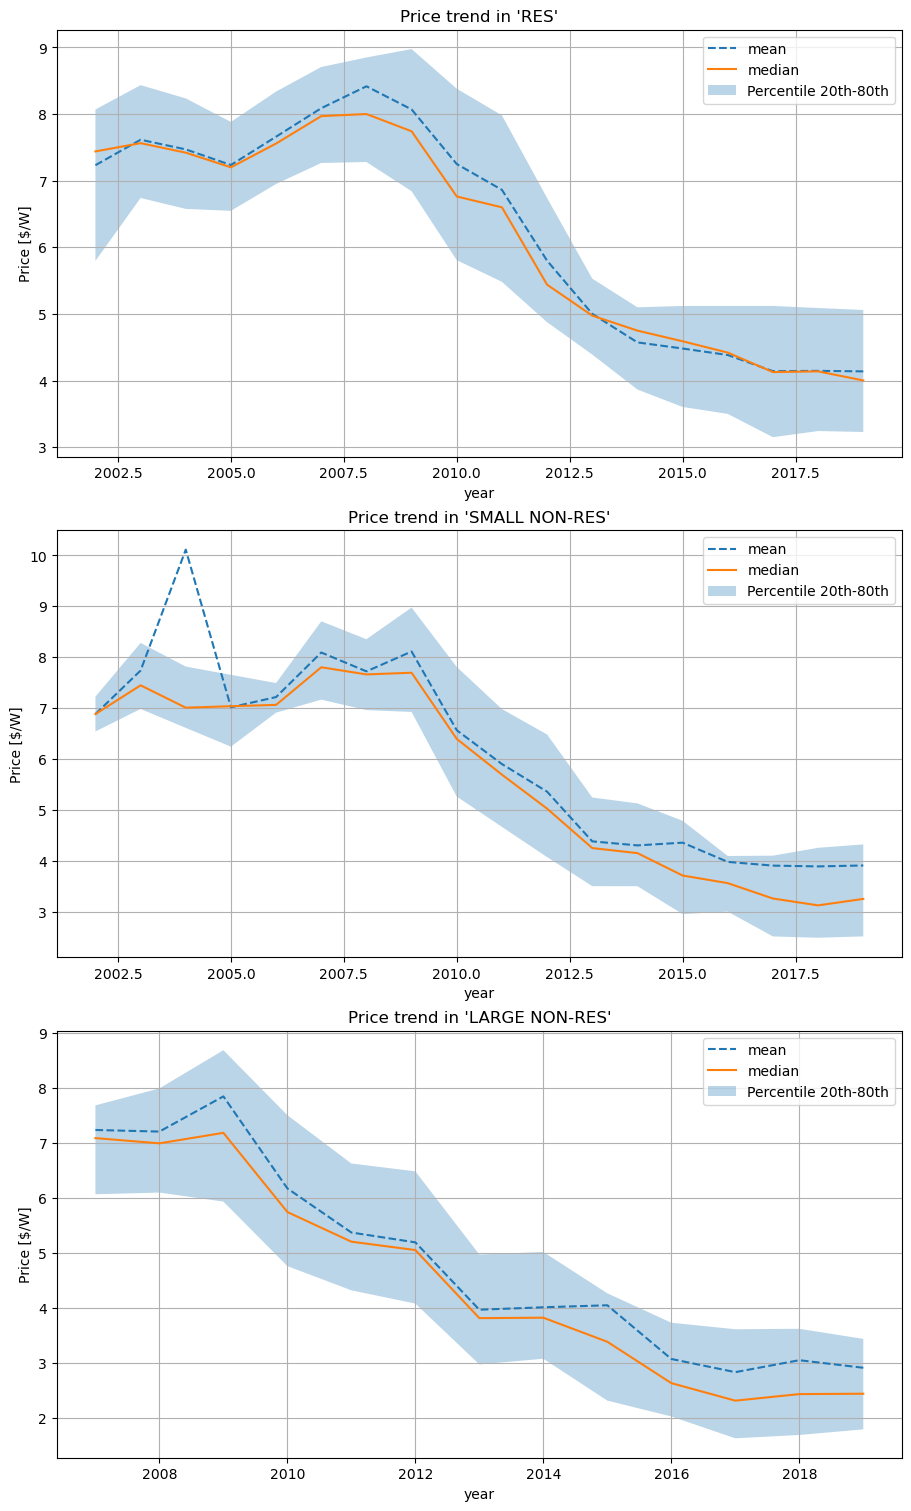

In [23]:
df = df_all.copy()
# Suodatukset tehty, jotta piirto onnistuu, koska se vaatii datan samoilta vuosilta
#df = df[(df['customer_segment'].isin(['RES', 'COM']))]
#df = df[(df['year'] > 2004)]
#df.drop(['installation_date'], axis=1, inplace=True)
df.dropna(subset=[price_col], inplace=True)
df1 = df[(df['customer_segment_3'].isin(['RES', 'SMALL NON-RES', 'LARGE NON-RES']))]
seg = df1['customer_segment_3'].unique()
#print(type(seg))
#print(seg)
year_stats = df1.groupby(['customer_segment_3', 'year'])
#years = df.groupby(['customer_segment_3'])

q_width = 0.6
q_high = 0.5 + q_width * 0.5
q_low = 0.5 - q_width * 0.5
trend_median = year_stats[price_col].median()
trend_mean = year_stats[price_col].mean()
trend_q_high = year_stats[price_col].quantile(q_high)  #.to_numpy().T
trend_q_low = year_stats[price_col].quantile(q_low)  #.to_numpy().T

#display(trend_q_high[0])
#display(trend_q_high)
#display(trend_mean)
#x = trend_mean['RES'].index
#x.sort_values(axis=0)
#print(x)
#display(trend_mean['RES'])
#display(trend_mean['SMALL NON-RES'])
#display(trend_mean['LARGE NON-RES'])

#sy = years['year']
#x = sy['RES'].sort(axis=0)
#display(sy['RES'])

#x = df['year'].unique()
#x.sort(axis=0)

def format_date(x1, pos=None):
    thisind = np.clip(int(x1 + 0.5), 0, N - 1)
    return x[thisind]

locator = mdates.AutoDateLocator(minticks=8)

fig_h = 5
fig_w = 9
fig_rows = len(seg)
fig_cols = 1
fig, axs = plt.subplots(fig_rows, fig_cols, layout="constrained", figsize=((fig_cols*fig_w),(fig_rows*fig_h)))

for i in range(len(seg)):
  df = df1.copy()
  df = df[(df['customer_segment_3'] == seg[i])]
  df.dropna(subset=[price_col], inplace=True)
  x = df['year'].unique()
  #x = trend_mean[seg[i]].index
  x.sort(axis=0)
  N = len(x)
  #print("N:", N)
  ind = x
  #ind = np.arange(N)

  axs[i].plot(ind, trend_mean[seg[i]], label='mean', linestyle='--')
  axs[i].plot(ind, trend_median[seg[i]], label='median')
  axs[i].fill_between(ind, trend_q_low[seg[i]], trend_q_high[seg[i]], alpha=0.3, label=f'Percentile {str(int(100*q_low))}th-{str(int(100*q_high))}th')
  #axs[i].xaxis.set_major_locator(locator)
  #axs[i].xaxis.set_major_formatter(format_date)
  axs[i].set_xlabel('year')
  axs[i].set_ylabel('Price [$/W]')
  axs[i].set_title(f"Price trend in '{seg[i]}'")
  axs[i].legend()
  axs[i].grid()
plt.show()